In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from icecream import ic

### Read raw spectra data

- Raw input shape: (2039, 7377)
- 7377 positions (i.e. slices)
- 2039 different wavelengths

(1000.0, 1200.0)

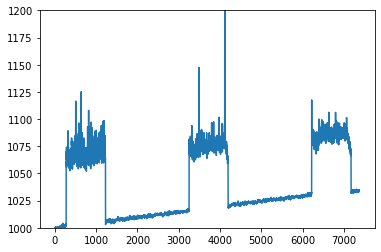

In [2]:
# This code is borrowed from Dr. Wenbo Sun
path = "Data/spectra/f15 1800w 1.00beamdia 3v 3 layer z-7 (1Dr).SOMS"
full_spectra = np.loadtxt(open(path, "rb"), delimiter="\t")
avg_spectra = np.mean(full_spectra, axis = 0)
plt.plot(avg_spectra)
plt.ylim(1000, 1200)

In [3]:
ic(full_spectra.shape)
ic(avg_spectra.shape)

ic| full_spectra.shape: (2039, 7377)
ic| avg_spectra.shape: (7377,)


(7377,)

In [4]:
threshold = 1040
up_j, down_j = 0, 0
up_pos, down_pos = np.zeros(3), np.zeros(3)
for i in range(len(avg_spectra) - 1):
    if (avg_spectra[i] > threshold) & (avg_spectra[i - 1] < threshold):
        up_pos[up_j] = i
        up_j += 1
    if (avg_spectra[i] > threshold) & (avg_spectra[i + 1] < threshold):
        down_pos[down_j] = i
        down_j += 1
ic(up_pos)
ic(down_pos)

ic| up_pos: array([ 273., 3253., 6222.])
ic| down_pos: array([1226., 4195., 7176.])


array([1226., 4195., 7176.])

In [5]:
# find the spectra length for active signals
len_spectra = int(min(down_pos - up_pos))
len_spectra

942

In [6]:
shift_pos = np.floor((down_pos - up_pos - np.ones(3) * len_spectra) / 2).astype(int)
start_pos = up_pos.astype(int) + shift_pos
end_pos = up_pos.astype(int) + shift_pos + np.ones(3).astype(int) * len_spectra

In [7]:
# Read in spectra features and stack the spectra features of the three active layers
spec_feat_path = "Data/features/spec_feat.csv"
feature_spectra = np.loadtxt(open(spec_feat_path, "rb"), delimiter=",")
feature_spectra_stack = np.zeros((len_spectra, feature_spectra.shape[1], 3))
for i in range(3):
    feature_spectra_stack[:, :, i] = feature_spectra[start_pos[i] : end_pos[i], :]

In [8]:
# Read in the image features
img_feat_path = "Data/features/img_feat.csv"
feature_image = np.loadtxt(open(img_feat_path, "rb"), delimiter=",")

In [9]:
# Return the feature given any start and end location (0 - 35mm)
# 35mm for spectrum & image
def feature_spectra_window(spec_feat, start_len, end_len):
    start_spectra = int(start_len / 35 * len_spectra)
    end_spectra = int(end_len / 35 * len_spectra)
    return(spec_feat[start_spectra : end_spectra, :, :])

def feature_image_window(img_feat, start_len, end_len):
    start_spectra = int(start_len / 35 * feature_image.shape[0])
    end_spectra = int(end_len / 35 * feature_image.shape[0])
    return(img_feat[start_spectra : end_spectra, :])

In [10]:
# Test
def get_img_spec_window(spec_feat, img_feat, start_len, end_len):
    print(f"start: {np.round(start_len, 2)}mm | end: {np.round(end_len, 2)}mm")
    spec = feature_spectra_window(spec_feat, start_len, end_len)
    # print(f" -- spectra window feature shape: {spec.shape}")
    print(f" -- spectra window size: {spec.shape[0]}")
    img = feature_image_window(img_feat, start_len, end_len)
    # print(f" -- image window feature shape: {img.shape}")
    print(f" -- image window size: {img.shape[0]}")
    return spec, img

In [12]:
def print_consecutive_windows_info(spec_feat, img_feat, start_len, end_len, step_size):
    cur_start = start_len
    cur_end = cur_start + step_size
    while cur_end <= end_len:
        _, _ = get_img_spec_window(spec_feat, img_feat, cur_start, cur_end)
        cur_start += step_size
        cur_end += step_size

In [14]:
print_consecutive_windows_info(feature_spectra_stack, feature_image, 0, 1, 0.1)

start: 0mm | end: 0.1mm
 -- spectra window size: 2
 -- image window size: 11
start: 0.1mm | end: 0.2mm
 -- spectra window size: 3
 -- image window size: 12
start: 0.2mm | end: 0.3mm
 -- spectra window size: 3
 -- image window size: 11
start: 0.3mm | end: 0.4mm
 -- spectra window size: 2
 -- image window size: 12
start: 0.4mm | end: 0.5mm
 -- spectra window size: 3
 -- image window size: 11
start: 0.5mm | end: 0.6mm
 -- spectra window size: 3
 -- image window size: 12
start: 0.6mm | end: 0.7mm
 -- spectra window size: 2
 -- image window size: 11
start: 0.7mm | end: 0.8mm
 -- spectra window size: 3
 -- image window size: 12
start: 0.8mm | end: 0.9mm
 -- spectra window size: 3
 -- image window size: 12
start: 0.9mm | end: 1.0mm
 -- spectra window size: 2
 -- image window size: 11
